In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from tkinter import *
from tkinter import messagebox
import sys 
import urllib
import urllib.request
from collections import Counter

In [9]:
data = pd.read_csv("../Dataset/dataset.csv")
severity = pd.read_csv("../Dataset/symptom_severity.csv")
precaution = pd.read_csv("../Dataset/symptom_precaution.csv")
description = pd.read_csv("../Dataset/symptom_description.csv")

In [10]:
data.shape

(4920, 18)

In [11]:
severity.shape

(133, 2)

In [12]:
precaution.shape

(41, 5)

In [13]:
description.shape

(41, 2)

In [49]:
null_checker = data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


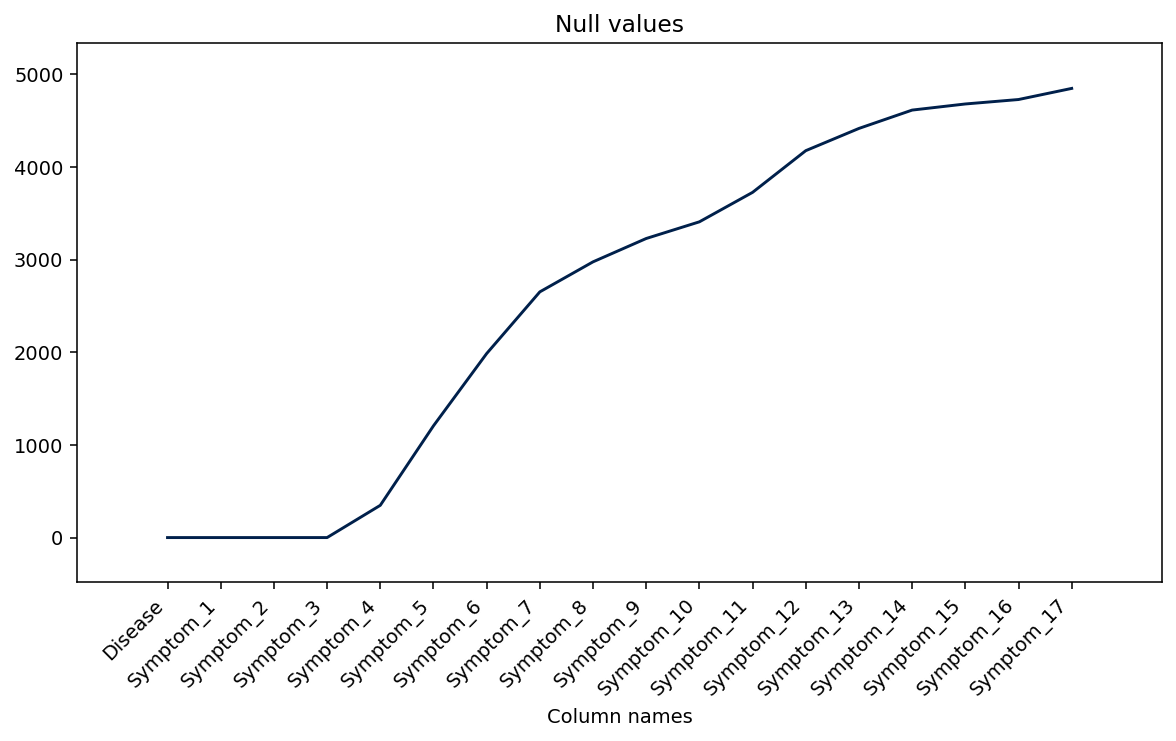

In [53]:
plt.figure(figsize=(10, 5), dpi=140)
plt.plot(null_checker.index, null_checker['count'], color='#00204B')
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Null values')
plt.xlabel('Column names')
plt.margins(0.1)
plt.show()

In [14]:
data.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [15]:
Symptoms_columns = data[data.columns[1:]].columns

In [16]:
Symptoms_columns

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
       'Symptom_16', 'Symptom_17'],
      dtype='object')

#### Let's get all symptoms and save it into one array

In [17]:
symptoms = []
for col in Symptoms_columns :
    symptoms = symptoms + list(data[Symptoms_columns[0]].values)

In [18]:
symptoms[:5]

['itching', ' skin_rash', 'itching', 'itching', 'itching']

In [19]:
counter = Counter(symptoms)

In [20]:
counter

Counter({'itching': 11526,
         ' skin_rash': 8160,
         ' continuous_sneezing': 3774,
         ' shivering': 204,
         ' stomach_pain': 1938,
         ' acidity': 2040,
         ' vomiting': 13974,
         ' indigestion': 204,
         ' muscle_wasting': 1836,
         ' patches_in_throat': 204,
         ' fatigue': 11730,
         ' weight_loss': 102,
         ' sunken_eyes': 204,
         ' cough': 204,
         ' headache': 2142,
         ' chest_pain': 204,
         ' back_pain': 1836,
         ' weakness_in_limbs': 204,
         ' chills': 8058,
         ' joint_pain': 7854,
         ' yellowish_skin': 204,
         ' constipation': 1938,
         ' pain_during_bowel_movements': 102,
         ' breathlessness': 204,
         ' cramps': 102,
         ' weight_gain': 204,
         ' mood_swings': 102,
         ' neck_pain': 102,
         ' muscle_weakness': 1938,
         ' stiff_neck': 102,
         ' pus_filled_pimples': 102,
         ' burning_micturition': 1836,
  

In [21]:
results = pd.Series(dict(counter))

In [22]:
results.head()

itching                 11526
 skin_rash               8160
 continuous_sneezing     3774
 shivering                204
 stomach_pain            1938
dtype: int64

<AxesSubplot:>

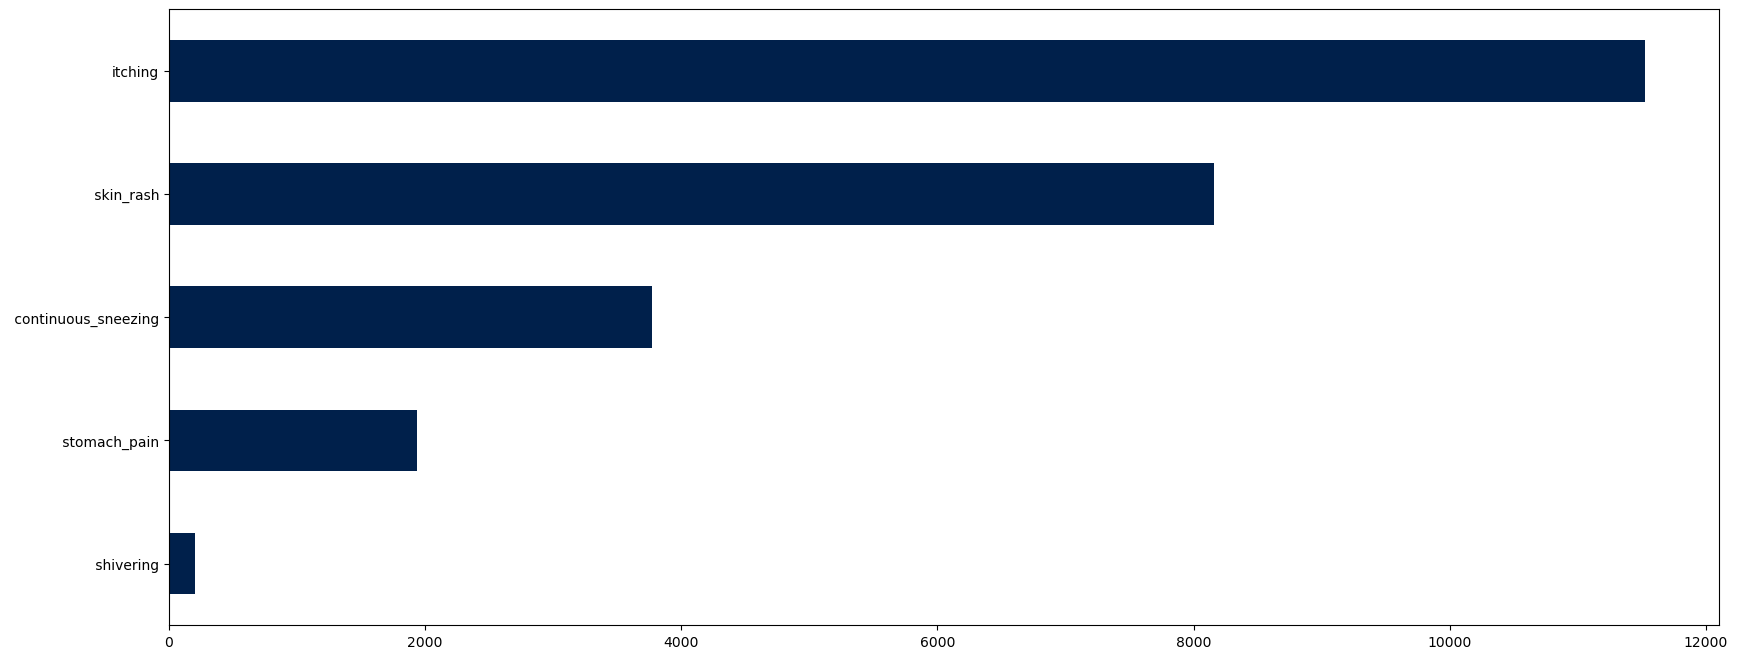

In [51]:
results.head().sort_values(ascending=True).plot(kind='barh', color='#00204B',figsize=(20,8))

In [24]:
symptoms = []

for col in data.columns[1:]:
    symptoms.append(data[col].unique())

In [25]:
unique_symp = []

for row in symptoms:
    for symp in row:
        if (symp not in unique_symp) and (symp is not np.nan):
            unique_symp.append(symp.strip())

In [26]:
symp=set(unique_symp)

In [27]:
symp_new=list(symp)

In [47]:
len(symp_new)

131

In [29]:
values = [0.0] * 131
symp_dict = dict(zip(symp_new, values))

In [30]:
l2=[]
for i in range(0,len(symp_new)):
    l2.append(0)

In [31]:
encoded = []

for i in range(len(data)):
    row = data.iloc[i].values
    temp = dict(zip(symp_new, values))

    for i in row:
        if i is not np.nan:
            temp[i.strip()] = 1.0

    encoded.append(temp)

In [34]:
training = pd.DataFrame(data=encoded)
training['disease'] = data['Disease']
training.fillna(value=0,inplace=True)

In [35]:
training.to_csv('../Filtered Data/training.csv')